In [1]:
%matplotlib inline
%pylab inline
import cosima_cookbook as cc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import copy
import math
from collections import OrderedDict

Populating the interactive namespace from numpy and matplotlib


In [2]:
import climtas.nci
climtas.nci.GadiClient(malloc_trim_threshold='64kib')

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/35851/status,
Dashboard: /proxy/35851/status,Workers: 8
Total threads: 8,Total memory: 128.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:42565,Workers: 8
Dashboard: /proxy/35851/status,Total threads: 8
Started: Just now,Total memory: 128.00 GiB
Comm: tcp://127.0.0.1:46331,Total threads: 1
Dashboard: /proxy/40403/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:33081,


In [3]:
session = cc.database.create_session()

In [4]:
figdir = ''
def savefigure(fname):
    plt.savefig(os.path.join(figdir, fname+'.png'),dpi=300, bbox_inches="tight")  # comment out to disable saving
#     plt.savefig(os.path.join(figdir, fname+'.pdf'),dpi=300, bbox_inches="tight")  # comment out to disable saving
    return

# EAC trans

In [5]:
ds = xr.open_dataset('/g/data/v45/aek156/IMOS_EAC/EAC_filled-daily-distance-depth-gridded-product_20120401-20210529.nc')

In [6]:
v = ds.VCUR

In [7]:
k = 111e3*math.cos(math.radians(27))
area = diff(v.LONGITUDE)[0]*k*diff(v.DEPTH)[0]
ty_trans = v*area

## Upper ocean transport

In [13]:
tstart = pd.to_datetime('2012/04/01')
tend = pd.to_datetime('2019/01/01')
trans1 = ty_trans.sel(TIME=slice(tstart,tend)).sel(DEPTH=slice(0,2000)).resample(TIME='M').mean('TIME').sum('LONGITUDE').sum('DEPTH')
transport1 = trans1/1e6

In [14]:
transport1

<xarray.DataArray 'VCUR' (TIME: 81)>
array([-11.55399151,  -6.86921415,  -7.63001088, -18.22003933,
       -18.74454261, -18.43742162, -13.37339926, -16.42090052,
        -7.82710096, -16.23779164, -12.75850892, -15.09741966,
       -14.04759343, -14.66590123, -14.09660517, -18.01579515,
       -12.74264726,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  -6.79268627, -23.16162599, -16.46450438,
       -10.68942277, -28.13655349, -19.39458983, -20.76461546,
       -24.65591909, -21.39083244, -14.27438422, -18.11729703,
       -22.50864582, -10.98447278,  -5.81253345, -15.4588793 ,
       -13.11784614, -23.36209847, -13.39630681,  -6.0986324 ,
       -37.56772996, -18.41743505, -19.47106714,  -6.9711512 ,
        -4.16806943,  -9.11186051, -15.2889571 , -12.61706843,
        -6.54096443, -15.74146216, -17.57762095,  -7.42474035,
       -15.60703408, -18.70581015, -17.53952988, -14.32604747,
       -10.36090375,  -9.08818727, -19.26603741, -11.97044704,
       -15.53364582, -30.54004737, -15.79236954, -23.78401389,
       -21.06949053])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2012-04-30 2012-05-31 ... 2018-12-31

In [15]:
transport1 = transport1[transport1 != 0]

In [16]:
transport1

<xarray.DataArray 'VCUR' (TIME: 61)>
array([-11.55399151,  -6.86921415,  -7.63001088, -18.22003933,
       -18.74454261, -18.43742162, -13.37339926, -16.42090052,
        -7.82710096, -16.23779164, -12.75850892, -15.09741966,
       -14.04759343, -14.66590123, -14.09660517, -18.01579515,
       -12.74264726,  -6.79268627, -23.16162599, -16.46450438,
       -10.68942277, -28.13655349, -19.39458983, -20.76461546,
       -24.65591909, -21.39083244, -14.27438422, -18.11729703,
       -22.50864582, -10.98447278,  -5.81253345, -15.4588793 ,
       -13.11784614, -23.36209847, -13.39630681,  -6.0986324 ,
       -37.56772996, -18.41743505, -19.47106714,  -6.9711512 ,
        -4.16806943,  -9.11186051, -15.2889571 , -12.61706843,
        -6.54096443, -15.74146216, -17.57762095,  -7.42474035,
       -15.60703408, -18.70581015, -17.53952988, -14.32604747,
       -10.36090375,  -9.08818727, -19.26603741, -11.97044704,
       -15.53364582, -30.54004737, -15.79236954, -23.78401389,
       -21.06949053])
Coordinates:
  * TIME     (TIME) datetime64[ns] 2012-04-30 2012-05-31 ... 2018-12-31

In [17]:
transport1.mean('TIME')

<xarray.DataArray 'VCUR' ()>
array(-15.50495771)

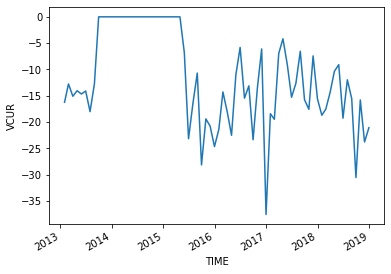

In [14]:
transport1.plot()

In [30]:
transport1.to_netcdf('2.1 EAC_trans_IMOS/EAC_trans_0-2000m_2.nc') 